In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model
import tensorflow as tf

import matplotlib.pyplot as plt

### Data load

In [2]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Dataset/sonar.csv'
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### Data preprocessing

In [3]:
dataset = df.values
X = dataset[:, 0:60] # select input columns
Target = dataset[:, 60] # select the target column

e = LabelEncoder() # Instantiation
e.fit(Target) # Fitting
Y = e.transform(Target) # Converting string labels to numeric labels


### Data split

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

### Model define

In [5]:
def ModelStruc(NHidd):
    
    Inp = Input(X_train.shape[-1], ) # input layer
    
    #----------------------  stack of hidden layers  -------------------
    Hidden = Dense(X_train.shape[-1], 'relu')(Inp)

    for i in range(NHidd-1): # stack of hidden layers
        Hidden = Dense( (X_train.shape[-1]-i*3), 'relu')(Hidden)

    #----------------------  stack of hidden layers  -------------------
    
    Output = Dense(1, 'sigmoid')(Hidden)  # target layer
    
    sonar = Model(Inp, Output)
    sonar.compile(loss=tf.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics='accuracy')
    
    return sonar


### Experiments

In [6]:
TrLossList= []
ValLossList = []

for i in range(4, 24, 4):
    sonar = ModelStruc(i)
    sonar.summary()
    history =sonar.fit(X_train.astype('float32'), Y_train, validation_data=(X_test.astype('float32'), Y_test), epochs=100, batch_size=10, shuffle=True, verbose=2)
    TrLossList.append(history.history['loss'])
    ValLossList.append(history.history['val_loss'])
    print(i)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense (Dense)                (None, 60)                3660      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_2 (Dense)              (None, 57)                3477      
_________________________________________________________________
dense_3 (Dense)              (None, 54)                3132      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 55        
Total params: 13,984
Trainable params: 13,984
Non-trainable params: 0
_________________________________________________________

### Postprocessing for visualization

In [7]:
TrLossDF = pd.DataFrame(TrLossList).T
TrLossDF.columns = ['HiddSize: '+str(i) for i in range(4, 24, 4)]

ValLossDF = pd.DataFrame(ValLossList).T
ValLossDF.columns = ['HiddSize: '+str(i) for i in range(4, 24, 4)]

### Plot Tr_losses over epochs

Text(0, 0.5, 'Loss')

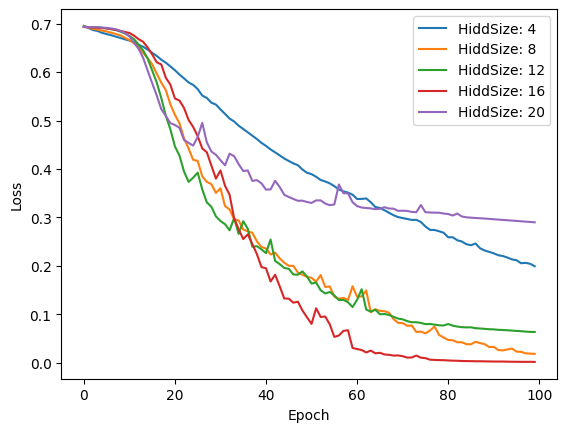

In [8]:
for i in TrLossDF.columns:
    plt.plot(TrLossDF[i], label=i)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

### Plot Val_losses over epochs

Text(0, 0.5, 'Loss')

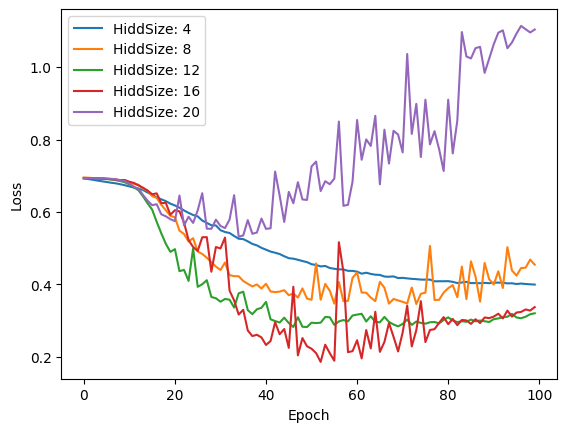

In [9]:
for i in ValLossDF.columns:
    plt.plot(ValLossDF[i], label=i)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

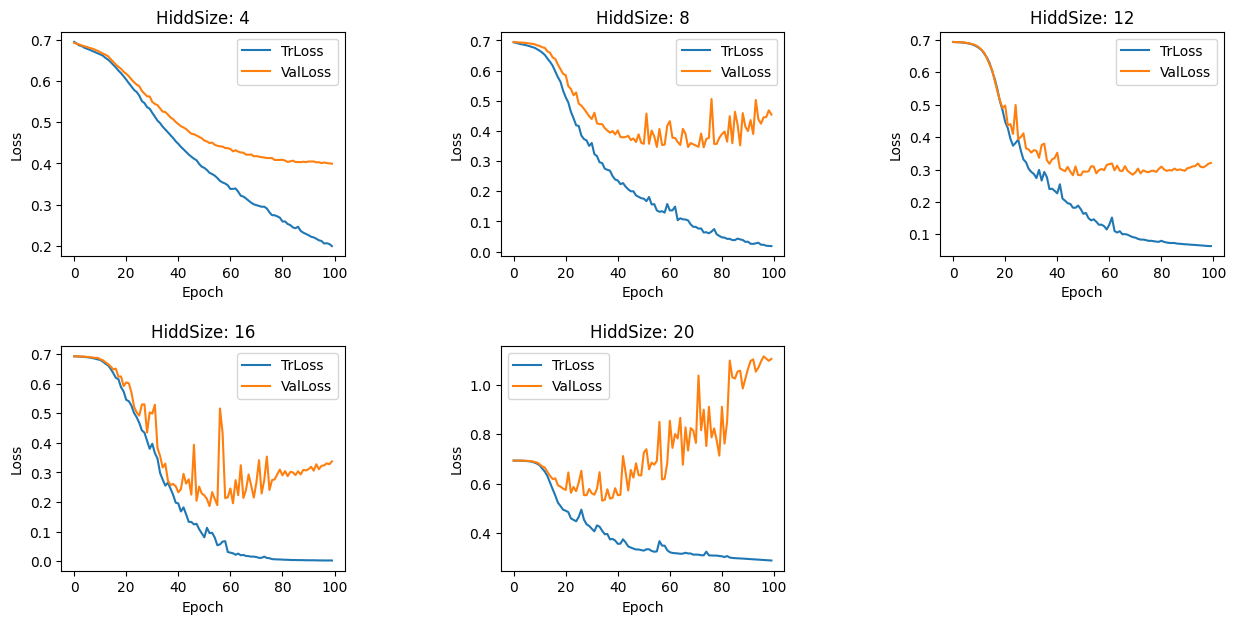

In [10]:
plt.figure(figsize=(15,7))
for num, i in enumerate(ValLossDF.columns):
    plt.subplot(2,3,num+1)
    plt.plot(TrLossDF[i], label='TrLoss')
    plt.plot(ValLossDF[i], label='ValLoss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.subplots_adjust(wspace=0.55, hspace=0.4)
    plt.title(i)

